In [1]:
import sklearn.datasets as ds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

a) narzędzia wizualne podejmowania decyzji

In [2]:
california_housing_ds = ds.fetch_california_housing()
df_features = pd.DataFrame(california_housing_ds.data, columns=california_housing_ds.feature_names)
df_targets = pd.DataFrame(california_housing_ds.target, columns=['target'])

In [3]:
df_features.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

##### Boxplots

<AxesSubplot:>

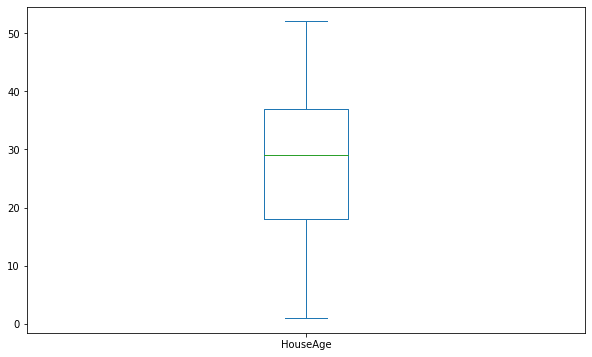

In [4]:
plt.rcParams["figure.figsize"] = (10, 6)
df_features['HouseAge'].plot(kind='box')

<AxesSubplot:>

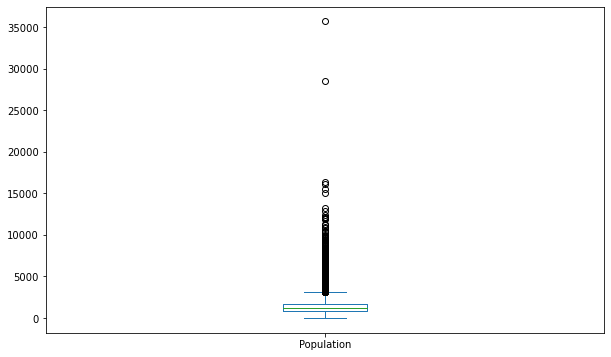

In [5]:
df_features['Population'].plot(kind='box')

Wyjaśnienie boxplot:

![boxplot-explained](boxplot.png)

b) narzędzia statystyczne podejmowania decyzji

##### metoda Z-score
O ile standardowych odchyleń od średniej oddalona jest dana wartość

In [6]:
mean = np.mean(df_features['Population']) 
std = np.std(df_features['Population'])
threshold = 3
outliers = []
for i in df_features['Population']:
    z = (i - mean) / std
    if z > threshold:
        outliers.append(z)
    
outliers.sort()
print(outliers)

[3.002842718062172, 3.003725771196106, 3.00460882433004, 3.00460882433004, 3.006374930597908, 3.021386833874787, 3.0266851526783918, 3.027568205812326, 3.033749577749864, 3.033749577749864, 3.0346326308837983, 3.0372817902856006, 3.0399309496874025, 3.0416970559552707, 3.046995374758875, 3.0549428529642815, 3.0549428529642815, 3.0611242249018202, 3.0620072780357543, 3.0717208625090286, 3.074370021910831, 3.0779022344465674, 3.0823175001162375, 3.0832005532501716, 3.091148031455578, 3.0946802439913146, 3.099978562794919, 3.107042987866391, 3.1079260410003253, 3.11322435980393, 3.1141074129378636, 3.1176396254736, 3.130002369348677, 3.1353006881522814, 3.1414820600898197, 3.143248166357688, 3.149429538295226, 3.1573770165006327, 3.160909229036369, 3.1617922821703033, 3.1635583884381715, 3.1635583884381715, 3.1688567072417757, 3.173271972911446, 3.17415502604538, 3.175921132313248, 3.1768041854471822, 3.1794533448489846, 3.1803363979829187, 3.1829855573847206, 3.1847516636525888, 3.186517

##### zasada IQR

In [7]:
quartile1 = np.quantile(df_features['Population'], 0.25)
quartile3 = np.quantile(df_features['Population'], 0.75)
median = np.median(df_features['Population'])
iqr = quartile3 - quartile1
upper_bound = quartile3 + (1.5 * iqr)
lower_bound = quartile1 - (1.5 * iqr)
print('IQR:', iqr, 'Upper limit:', upper_bound, 'Lower limit:', lower_bound)

IQR: 938.0 Upper limit: 3132.0 Lower limit: -620.0


In [8]:
len(df_features)

20640

populacja nie może być mniejsza niż 0, więc nie musimy się przejmować dolnym limitem

In [9]:
outliers_df = df_features[df_features['Population'] > upper_bound]
outliers_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
95,2.0096,36.0,2.294016,1.066294,3469.0,1.493328,37.80,-122.26
185,2.1917,43.0,4.844029,1.091795,4367.0,3.547522,37.79,-122.23
283,5.9849,22.0,6.528724,1.041179,4985.0,2.534316,37.79,-122.16
460,1.4012,52.0,3.105714,1.060000,3337.0,9.534286,37.87,-122.26
485,1.6307,35.0,2.962687,1.001148,3276.0,1.880597,37.86,-122.26
...,...,...,...,...,...,...,...,...
20543,1.7311,33.0,3.882852,1.029994,3717.0,2.103565,38.55,-121.74
20544,2.0650,23.0,4.803493,1.013646,6330.0,3.455240,38.55,-121.76
20563,3.1250,9.0,5.148007,1.119593,6837.0,2.899491,38.67,-121.75
20604,2.3496,17.0,4.551392,0.962527,3265.0,3.495717,39.12,-121.54


c) proces usunięcia tych danych

Wartości oznaczonych jako odstające jest około 5.8%, czyli sporo. Należałoby się tutaj zastanowić, czy aby na pewno aż tak znaczna część powinna zostać usunięta

In [10]:
df_features_no_outliers = df_features.drop(outliers_df.index)
df_features_no_outliers[df_features_no_outliers['Population'] > upper_bound]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
